## Working with Data & a Real Cost Function
### Mean-Squared-Error
### $$ RSS = \sum_{i = 1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$ MSE =\frac{1}{n} \sum_{i = 1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$ MSE =\frac{1}{n} \sum_{i = 1}^{n} \big( y - \hat{y} \big)^2 $$

In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


In [61]:
#make sample data
x = np.array([[0.1 ,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)



#we can convert a array by 2 methods
#transpose and reshape(rws, columns)


In [62]:
# quick linear regression
regr = LinearRegression()
regr.fit(x,y)   

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029554
Theta 1:  1.222726463783591


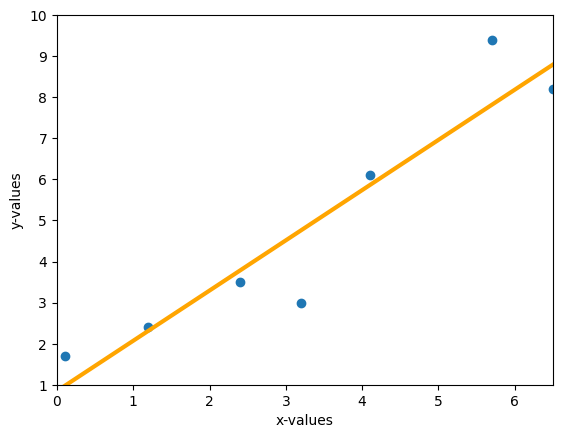

In [63]:
plt.scatter(x,y)
plt.plot(x , regr.predict(x), color = 'orange' , linewidth = 3)
plt.xlabel('x-values')
plt.ylabel('y-values')

plt.xlim(0,6.5)
plt.ylim(1,10)
plt.show()

In [64]:
# y_hat =  thaeta1*x + theta0
y_hat = 1.222726463783591*x + 0.8475351486029554
print('Estmate valus of y_hat are: \n',y_hat)

Estmate valus of y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [65]:
#MSE function
def mse(y,y_hat):
    return np.mean((y - y_hat)**2)


print("Mean-Squared-error using function: ", mse(y,y_hat))

print("Mean-Squared-error using library: ", mean_squared_error(y,y_hat))

Mean-Squared-error using function:  0.9479655759794575
Mean-Squared-error using library:  0.9479655759794575


### 3D plot for the MSE cost function

In [66]:
nr_thetas = 200
th_O = np.linspace(-1,3,nr_thetas)
th_1 = np.linspace(-1,3,nr_thetas)

plot_p0, plot_p1 = np.meshgrid(th_O,th_1)

In [67]:
#calculate MSE using nested for loops
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_p0[i][j])
        y_hat = plot_p0[i][j] + plot_p1[i][j]*x
        plot_cost[i][j] = mse(y,y_hat)




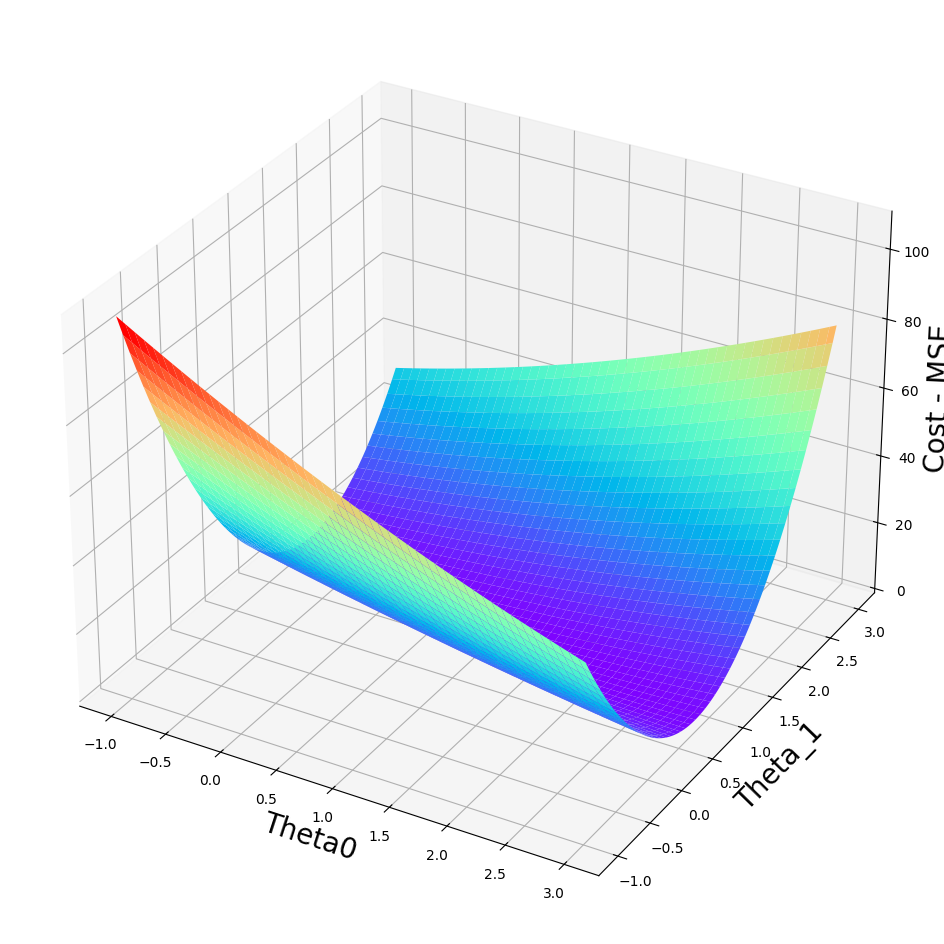

In [94]:
#plotting MSE
fig = plt.figure(figsize=[16,12])
plt.axes(projection ='3d')
ax = plt.gca()

ax.set_xlabel('Theta0',fontsize=20)
ax.set_ylabel('Theta_1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.plot_surface(plot_p0,plot_p1,plot_cost, cmap=cm.rainbow)
plt.show()

In [69]:
#finding the theta values with lowest cost
print('Min value of plot Cost',plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(),plot_cost.shape)
print('min occurs at [i][j]: ',ij_min)
print("min MSE for theta 0 at plot[111][91]", plot_p0[111][91])
print("min MSE for theta 1 at plot[111][91]", plot_p1[111][91])



Min value of plot Cost 0.9483826526747164
min occurs at [i][j]:  (np.int64(111), np.int64(91))
min MSE for theta 0 at plot[111][91] 0.829145728643216
min MSE for theta 1 at plot[111][91] 1.2311557788944723


### Partial derivative for $theta_0$ and $theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0}= -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1}= -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

In [74]:
#MSE and Gradient Descent
def grad(x, y , thetas):
    n= y.size
    theta0_slope = (-2 / n) * np.sum(y - thetas[0]-thetas[1] * x) 
    theta1_slope = (-2 / n) * np.sum((y - thetas[0]-thetas[1] * x) *x)

    return np.append(arr=theta0_slope, values = theta1_slope)

In [88]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

#For Collecting Data points for Scatter  plots
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y, thetas[0] + thetas[1]*x)

for i in range(1000):
    thetas = thetas - multiplier * grad(x,y,thetas)

    #Append new values
    plot_vals = np.append(arr=plot_vals, values= thetas.reshape(1,2), axis = 0)
    mse_vals = np.append(arr=mse_vals, values= mse(y,thetas[0]+thetas[1]*x))
    
# results 
print("min ocuurs at theta0: ",thetas[0])
print("min ocuurs at theta1: ",thetas[1])
print("MSE: ",mse(y, thetas[ 0] + thetas[1]*x))

min ocuurs at theta0:  0.8532230461743415
min ocuurs at theta1:  1.2214935332607393
MSE:  0.9479751138321334


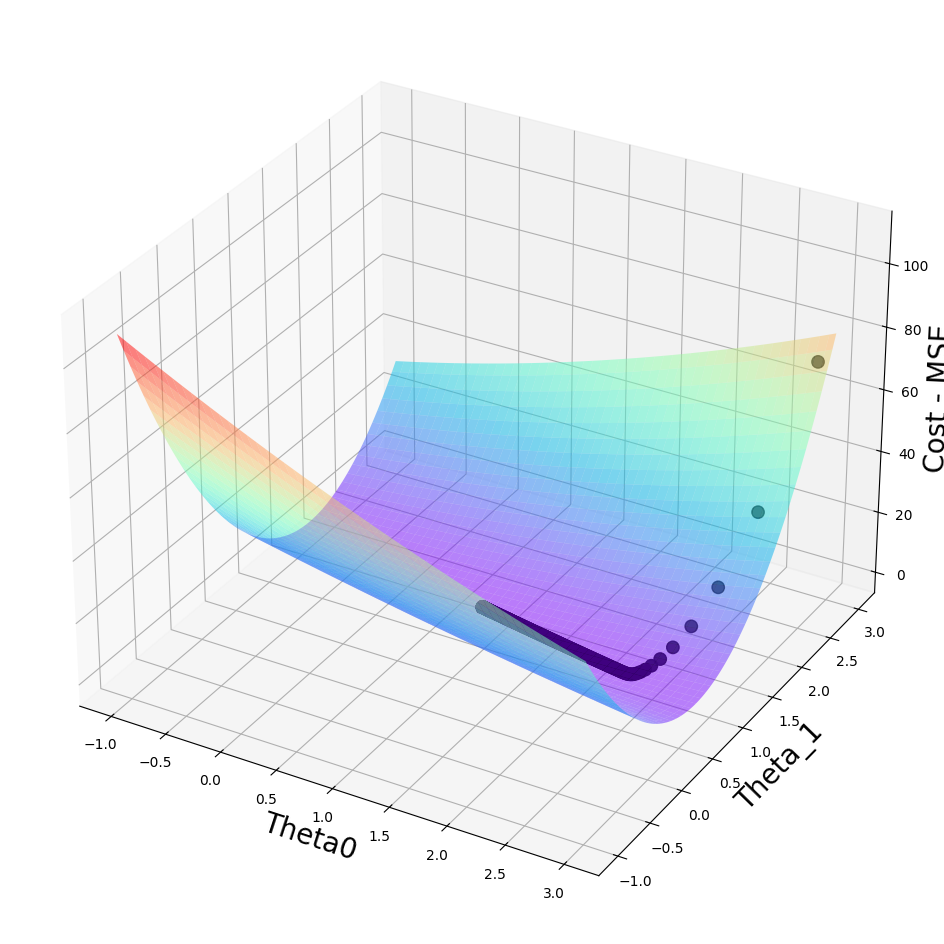

In [93]:
#plotting MSE
fig = plt.figure(figsize=[16,12])
ax=fig.add_subplot(111, projection = '3d')

ax.set_xlabel('Theta0',fontsize=20)
ax.set_ylabel('Theta_1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.scatter(plot_vals[: ,0],plot_vals[:, 1], mse_vals, s=80, color = 'black')
ax.plot_surface(plot_p0,plot_p1,plot_cost, cmap=cm.rainbow, alpha= 0.5)
plt.show()